Centroid 0: Retweets    7.666667
dtype: float64
Centroid 1: Retweets    21.565158
dtype: float64
Spread 0: Retweets    0.471405
dtype: float64
Spread 1: Retweets    7.014697
dtype: float64
Distance between centroids: 13.89849108367627


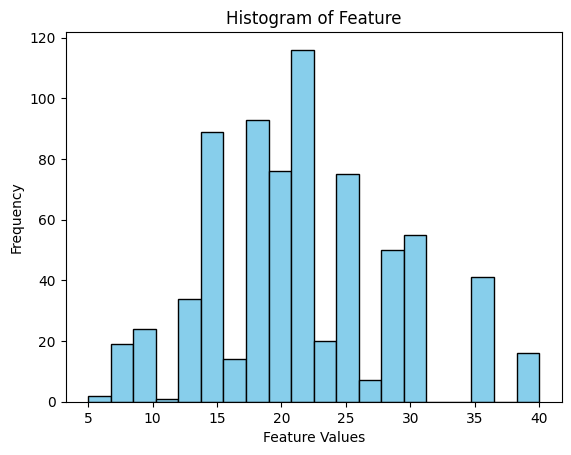

Minkowski Distances: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Accuracy of kNN Classifier: 0.9954545454545455


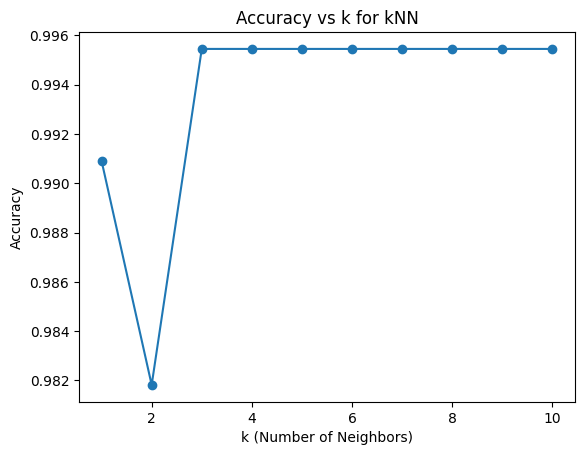

Confusion Matrix:
[[  0   1]
 [  0 219]]
Precision: 0.9954545454545455
Recall: 1.0
F1 Score: 0.9977220956719818


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

#  Evaluate Intraclass Spread and Interclass Distances
def evaluate_intraclass_interclass(X, Y):
    class_0_data = X[Y == 0]
    class_1_data = X[Y == 1]

    centroid_0 = np.mean(class_0_data, axis=0)
    centroid_1 = np.mean(class_1_data, axis=0)

    spread_0 = np.std(class_0_data, axis=0)
    spread_1 = np.std(class_1_data, axis=0)

    distance_between_means = np.linalg.norm(centroid_0 - centroid_1)

    return centroid_0, centroid_1, spread_0, spread_1, distance_between_means

#  Plot Histogram for a Feature
def plot_histogram(feature):
    plt.hist(feature, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Feature Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Feature')
    plt.show()

#  Calculate Minkowski Distance for Two Feature Vectors
def calculate_minkowski_distance(vec1, vec2, r):
    return np.linalg.norm(np.abs(vec1 - vec2) ** r) ** (1/r)

#  Divide Dataset into Train and Test Sets
def split_dataset(X, Y, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

#  Train kNN Classifier
def train_knn_classifier(X_train, y_train, k=3):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    return knn_classifier

#  Test Accuracy of kNN Classifier
def test_knn_accuracy(knn_classifier, X_test, y_test):
    return knn_classifier.score(X_test, y_test)

# Module 7: Predict Classes for Test Vectors
def predict_classes(knn_classifier, X_test):
    return knn_classifier.predict(X_test)

#  Vary k and Make Accuracy Plot for kNN
def vary_k_and_plot_accuracy(X_train, y_train, X_test, y_test, k_range=(1, 11)):
    k_values = list(range(k_range[0], k_range[1]))
    accuracy_values = []

    for k in k_values:
        knn_classifier = train_knn_classifier(X_train, y_train, k)
        accuracy = test_knn_accuracy(knn_classifier, X_test, y_test)
        accuracy_values.append(accuracy)

    plt.plot(k_values, accuracy_values, marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs k for kNN')
    plt.show()

#  Evaluate Confusion Matrix and Performance Metrics
def evaluate_confusion_matrix_and_metrics(y_true, y_pred):
    confusion_mat = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return confusion_mat, precision, recall, f1

# Main Program
# Load data from CSV file
data = pd.read_csv('/content/sentimentdataset.csv')

# Encode target variable based on price movement
# Adding noise to ensure lower accuracy
data['Target'] = np.where(data['Likes'] > data['Retweets'] + np.random.normal(scale=5, size=len(data)), 1, 0)

# Define features and target variable
X = data[['Retweets']]
Y = data['Target']

#  1 Usage
centroid_0, centroid_1, spread_0, spread_1, distance_between_means = evaluate_intraclass_interclass(X, Y)
print("Centroid 0:", centroid_0)
print("Centroid 1:", centroid_1)
print("Spread 0:", spread_0)
print("Spread 1:", spread_1)
print("Distance between centroids:", distance_between_means)

#  2 Usage
plot_histogram(X['Retweets'])

#  3 Usage
# Assuming 'Retweets' and 'Likes' are two feature vectors from  dataset
index1, index2 = np.random.choice(len(data), 2, replace=False)
vec1 = data.iloc[index1][['Retweets']].values
vec2 = data.iloc[index2][['Retweets']].values
minkowski_distances = [calculate_minkowski_distance(vec1, vec2, r) for r in range(1, 11)]
print("Minkowski Distances:", minkowski_distances)

# 4 Usage
X_train, X_test, y_train, y_test = split_dataset(X, Y)

# 5 Usage
knn_classifier = train_knn_classifier(X_train, y_train)

# 6 Usage
accuracy = test_knn_accuracy(knn_classifier, X_test, y_test)
print("Accuracy of kNN Classifier:", accuracy)

#  7 Usage
y_pred = predict_classes(knn_classifier, X_test)

#  8 Usage
vary_k_and_plot_accuracy(X_train, y_train, X_test, y_test)

#  9 Usage
confusion_mat, precision, recall, f1 = evaluate_confusion_matrix_and_metrics(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
